In [1]:
import pandas as pd
import numpy as np
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Malgun Gothic'
%matplotlib inline

In [34]:
df=pd.read_excel('../원본데이터/19년도 가격데이터.xlsx')
pd.set_option('display.max_columns', None)

In [35]:
df_19=pd.read_excel('../원본데이터/19년도 가격데이터.xlsx')

In [36]:
df_19.head()

,업체코드,업체명,농가코드,농가명,이력번호,도축일,도체번호,판정일,판정구분,성별,생체중량,중량,등지방,1차등급,최종등급,경락단가,경락금액,삼겹비율,전체,Unnamed: 19,Unnamed: 20,등지방.1,Unnamed: 22,Unnamed: 23,삼겹,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,목심,Unnamed: 33,Unnamed: 34,갈비,Unnamed: 36,Unnamed: 37,등갈비\n무게,등심,Unnamed: 40,Unnamed: 41,Unnamed: 42,Unnamed: 43,안심\n무게,앞다리살,Unnamed: 46,Unnamed: 47,뒷다리살,Unnamed: 49,Unnamed: 50,Unnamed: 51,항정살\n무게,등심덧살\n무게,갈매기살\n무게
0,EnterpriseID,EnterpriseTrade,FarmID,FarmTrade,BARCODE,BUTDATE,ButNum,GradeDate,DecisionID,SEX,REALWEIGHT,JudgeWeight,BackFat,FirstClass,LastClass,NaN,NaN,NaN,살코기비율,지방비율,지방무게,두께1,두께2,두께3,(커머셜)무게,살코기무게,피하지방무게,피하지방비율,근간지방무게,근간지방비율,살코기비율,전체지방비율,무게,살코기무게,살코기비율,(커머셜)무게,살코기무게,살코기비율,DEGW,등심살무게,등심 비율,살코기무게,살코기비율,지방(피하+근간)비율,TENW,무게,살코기무게,살코기비율,무게,뒷다리 비율,살코기무게,살코기비율,HASW,DDSW,GASW
1,10466,도드람양돈협동조합,26780,농업회사법인(주)다산육종,110170100164,20190103,4001,20190103,1,거세,119.277,93,24,1,1,3209.0,298437.0,14.688172,61.3,34.32,26.68,31,26,28,13.66,10.32,5.84,28.67,2.94,14.72,51.45,43.42,4.56,3.8,66.52,3.84,3.78,60.8,0.9,5.34,NaN,6,62.31,37.8,0.96,8.34,7.9,57.85,17.14,NaN,15.72,68.11,0.54,0.44,0.26
2,10466,도드람양돈협동조합,26780,농업회사법인(주)다산육종,110170100164,20190103,4002,20190103,1,암,119.277,96,23,1,1,3369.0,323424.0,13.541667,63.4,32.38,26.14,32,27,29,13,10.56,5.82,28.62,2.82,13.7,53.1,41.77,4.82,4.06,69.11,3.94,3.9,60.07,0.92,5.96,NaN,6.52,65.05,34.67,1.02,8.76,8.38,59.17,18.12,NaN,16.68,69.71,0.52,0.42,0.28
3,10466,도드람양돈협동조합,26780,농업회사법인(주)다산육종,110170100164,20190103,4003,20190103,1,암,119.277,90,19,1+,3,3411.0,306990.0,13.488889,66,29.4,22.28,27,21,23,12.14,10.2,5.08,26.9,2.26,11.96,55.84,38.5,4.66,3.94,71.41,3.82,3.78,61.86,0.88,5.78,NaN,6.34,69.44,30.74,1,8.46,8.22,61.5,17.68,NaN,16.56,71.77,0.5,0.42,0.28
4,10466,도드람양돈협동조합,26780,농업회사법인(주)다산육종,110170100164,20190103,4004,20190103,1,암,119.277,87,16,1,1,3419.0,297453.0,13.632184,67.7,26.96,20.18,27,21,23,11.86,10.14,4.5,25.51,1.96,11.04,57.46,36.52,4.66,3.98,73.46,3.7,3.7,64.32,0.86,6.16,NaN,6.76,72.87,27.13,1.02,8.32,8.16,63.49,17.82,NaN,16.92,73.6,0.5,0.4,0.26


In [37]:
df_year_price=df['경락단가'].groupby([df['도축일']]).mean().to_frame()


In [38]:
df_year_price.reset_index(inplace=True)

In [40]:
df_year_price

,도축일,경락단가
0,20190103,3415.280347
1,20190104,3379.426136
2,20190107,3226.175926
3,20190108,3157.812672
4,20190109,3074.684814
...,...,...
206,20191220,2747.054217
207,20191227,2839.258993
208,20191230,3168.860714
209,20191231,2935.529412


In [41]:
df_year_price=df_year_price.drop(labels=210,axis=0)

In [42]:
df_year_price['도축일']=pd.to_datetime(df_year_price['도축일'])
df_year_price["년월"]=df_year_price['도축일'].dt.strftime("%Y-%m")

In [43]:
y_price=df_year_price['경락단가']
X_time=df_year_price['도축일']

#### 월별 도축두수 

In [44]:
df_month_head=df['업체명'].groupby([df['도축일']]).count().to_frame()


In [45]:
df_month_head.reset_index(inplace=True)

In [53]:
df_month_head=df_month_head.drop(labels=210,axis=0)

In [54]:
df_month_head

,도축일,업체명
0,20190103,346
1,20190104,352
2,20190107,432
3,20190108,363
4,20190109,349
...,...,...
205,20191219,342
206,20191220,332
207,20191227,278
208,20191230,280


In [55]:
# 여기서 y_head는 도축두수를 의미한다. 
y_head=df_month_head['업체명']

### 18년도 돼지고기 경락 단가 그래프

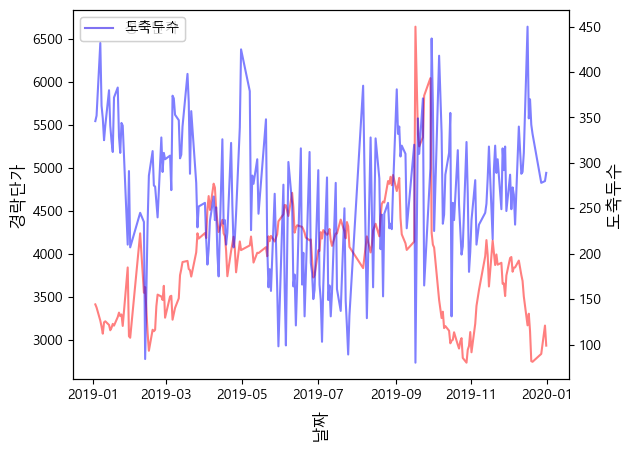

<Figure size 1200x3000 with 0 Axes>

In [56]:
#돼지고기 가격 그래프
fig,ax1=plt.subplots()
ax1.plot(X_time, y_price,color = 'red',label='경락단가',alpha=0.5)

#돼지고기 도축두수 그래프
ax2=ax1.twinx()
ax2.plot(X_time,y_head,color = 'blue',label='도축두수',alpha=0.5)
ax1.set_xlabel('날짜', fontsize=12,rotation=90)
ax1.set_ylabel('경락단가', fontsize=12)
ax2.set_ylabel('도축두수', fontsize=12)
plt.figure(figsize=(12,30))
ax1.legend(loc='upper left')
ax2.legend()
plt.show()

In [57]:
### 가장 경락 단가가 떨어졌던 시기
df_year_price[df_year_price['경락단가']==min(y_price)]

,도축일,경락단가,년월
171,2019-10-28,2737.03096,2019-10


### 